In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/yelp-dataset/yelp_academic_dataset_tip.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_checkin.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_user.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_business.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_review.json
/kaggle/input/yelp-dataset/Dataset_Agreement.pdf
/kaggle/input/yelpstopwords/yelp_stopwords.txt


In [2]:
import json
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:

yelp = open('/kaggle/input/yelp-dataset/yelp_academic_dataset_review.json')

#read the first 6000k entries
stop = 6000000 
all_data=list()
for i, line in enumerate(yelp):
    if i%1000000==0: print(i)
    if i==stop: break
    data=json.loads(line)
    text=data['text']
    stars=data['stars']
    all_data.append([stars, text])
    
df= pd.DataFrame(all_data, columns=['stars','text'])
print(df)

yelp.close()

0
1000000
2000000
3000000
4000000
5000000
6000000
         stars                                               text
0          2.0  As someone who has worked with many museums, I...
1          1.0  I am actually horrified this place is still in...
2          5.0  I love Deagan's. I do. I really do. The atmosp...
3          1.0  Dismal, lukewarm, defrosted-tasting "TexMex" g...
4          4.0  Oh happy day, finally have a Canes near my cas...
...        ...                                                ...
5999995    4.0  OverEasy Restaurant. I enjoyed the Bacon and C...
5999996    5.0  As a first timer at Viva Las Arepas in Las Veg...
5999997    5.0  This place is where I go out of my way couple ...
5999998    4.0  Extremely happy with this place! Ordered the l...
5999999    5.0  Fantastic service!!! I would call them again i...

[6000000 rows x 2 columns]


[1.0, 2.0, 3.0, 4.0, 5.0]


Text(0, 0.5, 'number')

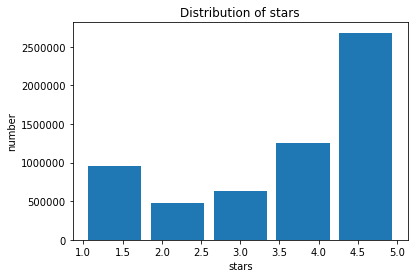

In [4]:
stars=df['stars']
print(sorted(stars.unique())) #고유값 나열
plt.hist(stars, bins=5, rwidth=0.85)
plt.title('Distribution of stars')
plt.xlabel('stars')
plt.ylabel('number')

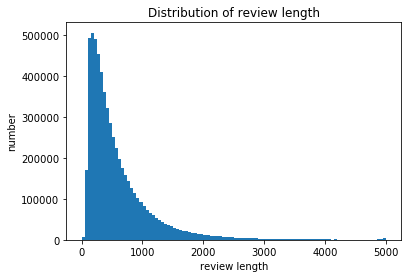

리뷰의 최대 길이 : 5000
리뷰의 평균 길이 : 589.96
리뷰의 중앙값 길이 : 416.00


In [5]:
import numpy as np

plt.clf() #clear previous figure
plt.hist(df['text'].str.len(),bins=100)
plt.title('Distribution of review length')
plt.xlabel('review length')
plt.ylabel('number')
plt.show()

len_result = [len(s) for s in df['text']]
print('리뷰의 최대 길이 : {}'.format(np.max(len_result)))
print('리뷰의 평균 길이 : {:.2f}'.format(np.mean(len_result)))
print('리뷰의 중앙값 길이 : {:.2f}'.format(np.median(len_result)))

In [6]:
star_1=df.loc[df.stars==1.0].copy()
star_2=df.loc[df.stars==2.0].copy()
star_3=df.loc[df.stars==3.0].copy()
star_4=df.loc[df.stars==4.0].copy()
star_5=df.loc[df.stars==5.0].copy()

print(len(star_1),len(star_2),len(star_4),len(star_5)) 

952507 475306 1256779 2683081


In [7]:
print(star_1.head(),star_2.head(),star_3.head(),star_4.head(),star_5.head(),)

    stars                                               text
1     1.0  I am actually horrified this place is still in...
3     1.0  Dismal, lukewarm, defrosted-tasting "TexMex" g...
15    1.0  If I could give less than one star, that would...
16    1.0  10pm on a super bowl Sunday and they're alread...
18    1.0  Tried to have my car repaired.  Even made an a...     stars                                               text
0     2.0  As someone who has worked with many museums, I...
32    2.0  This actually used to be one of my favorite ho...
63    2.0  Decent food. Fishermen lobster or even congee ...
78    2.0  Pros: Fun atmosphere, great for people watchin...
86    2.0  I love bookstores, and I love to spend some ti...     stars                                               text
19    3.0  My husband and I go there once a week since la...
34    3.0  The service is attentive. The decor attractive...
41    3.0  I stayed here back in April. Friday-Sunday. It...
42    3.0  Had brunch he

In [8]:
star_bad=pd.concat([star_1, star_2]) 
star_good=pd.concat([star_4[:500000], star_5[:1000000]]) 

star_bad.loc[:,'stars']=0.0
star_good.loc[:,'stars']=1.0

df2=pd.concat([star_bad,star_good])
print(len(star_bad),len(star_good),len(df2))
df2.reset_index(drop=True, inplace=True)
print(df2.head(),df2.tail())

1427813 1500000 2927813
   stars                                               text
0    0.0  I am actually horrified this place is still in...
1    0.0  Dismal, lukewarm, defrosted-tasting "TexMex" g...
2    0.0  If I could give less than one star, that would...
3    0.0  10pm on a super bowl Sunday and they're alread...
4    0.0  Tried to have my car repaired.  Even made an a...          stars                                               text
2927808    1.0  I walked in and after a very brief conversatio...
2927809    1.0  First off, this place has been on my bucket li...
2927810    1.0  I absolutely love this office. The team as a w...
2927811    1.0  This is our new fried Seafood place in this pa...
2927812    1.0  It was my first time getting a Brazilian wax, ...


In [9]:
df2.to_pickle("df2.pkl")

In [10]:
#import os
#os.remove("/kaggle/working/yelp_stopwords.txt")

In [11]:
#불용어 제거 

import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

'''
pin=100000
texts=[]
for i, line in enumerate(df2.loc[:,'text']): #index와 value 동시에 접근
    line = line.lower()
    word_tokens = word_tokenize(line)
    result=[]
    for w in word_tokens:
        if w not in stop_words:
            result.append(w)
    line_f=' '.join(result)
    texts.append(line_f)
    if i>0 and i%pin==0: 
        print(i,end='')
        with open('yelp_stopwords.txt', 'a') as f:
            for j in range(i-pin,i):
                f.write("%s\n" % texts[j])
'''

    
    

'\npin=100000\ntexts=[]\nfor i, line in enumerate(df2.loc[:,\'text\']): #index와 value 동시에 접근\n    line = line.lower()\n    word_tokens = word_tokenize(line)\n    result=[]\n    for w in word_tokens:\n        if w not in stop_words:\n            result.append(w)\n    line_f=\' \'.join(result)\n    texts.append(line_f)\n    if i>0 and i%pin==0: \n        print(i,end=\'\')\n        with open(\'yelp_stopwords.txt\', \'a\') as f:\n            for j in range(i-pin,i):\n                f.write("%s\n" % texts[j])\n'